<a href="https://colab.research.google.com/github/AvirupVIP/SVM_Model_for_Cats_and_Dogs/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload the files: train.zip, test1.zip, sampleSubmission.csv
from google.colab import files
uploaded = files.upload()


Saving sampleSubmission.csv to sampleSubmission.csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.zip to train.zip


In [4]:
from google.colab import files
uploaded = files.upload()


Saving test1.zip to test1.zip


In [6]:
import zipfile

# Unzip train.zip
with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall("train")
    print(" Unzipped train.zip")

# Unzip test1.zip
with zipfile.ZipFile("test1.zip", 'r') as zip_ref:
    zip_ref.extractall("test1")
    print(" Unzipped test1.zip")


 Unzipped train.zip
 Unzipped test1.zip


In [9]:
# Load and preprocess training images
import numpy as np
import cv2
import glob
from tqdm import tqdm

IMG_SIZE = 32
LIMIT = 1000  # Use 1000 images for faster training
TRAIN_FOLDER = './train'

image_paths = glob.glob(TRAIN_FOLDER + '/*.*')
image_paths = [p for p in image_paths if p.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = image_paths[:LIMIT]

images = []
labels = []

for img_path in tqdm(image_paths):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flattened = img_gray.flatten()
    images.append(img_flattened)

    if 'cat' in img_path.lower():
        labels.append(0)
    elif 'dog' in img_path.lower():
        labels.append(1)

images = np.array(images)
labels = np.array(labels)

print(f" Loaded {len(images)} images for training.")


0it [00:00, ?it/s]

 Loaded 0 images for training.


In [11]:
import os

print("FOLDER STRUCTURE:")
for root, dirs, files in os.walk(".", topdown=True):
    print(f"{root}/")
    for name in files[:5]:  # Show first 5 files in each folder
        print("   ", name)


FOLDER STRUCTURE:
./
    dog img1.jpg
    submission.csv
    train.zip
    sampleSubmission.csv
    test1.zip
./.config/
    default_configs.db
    active_config
    .last_opt_in_prompt.yaml
    .last_update_check.json
    .last_survey_prompt.yaml
./.config/logs/
./.config/logs/2025.07.29/
    13.36.27.119914.log
    13.36.15.785307.log
    13.36.25.001588.log
    13.36.37.567476.log
    13.35.49.066514.log
./.config/configurations/
    config_default
./test1/
./test1/test1/
    6673.jpg
    5482.jpg
    6833.jpg
    5096.jpg
    5402.jpg
./train/
./train/train/
    dog.7476.jpg
    cat.4386.jpg
    dog.180.jpg
    dog.11327.jpg
    cat.1337.jpg
./sample_data/
    README.md
    anscombe.json
    mnist_train_small.csv
    mnist_test.csv
    california_housing_train.csv


In [5]:
TRAIN_FOLDER = './train/train'



In [7]:
import numpy as np
import cv2
import glob
from tqdm import tqdm

IMG_SIZE = 64       # Resize to 64x64
LIMIT = 1000        # Limit number of images for fast training

image_paths = glob.glob(TRAIN_FOLDER + '/*.*')
image_paths = [p for p in image_paths if p.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = image_paths[:LIMIT]

images = []
labels = []

for img_path in tqdm(image_paths):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flattened = img_gray.flatten()
    images.append(img_flattened)

    # Assign label
    if 'cat' in img_path.lower():
        labels.append(0)
    elif 'dog' in img_path.lower():
        labels.append(1)

images = np.array(images)
labels = np.array(labels)

print(f" Loaded {len(images)} images for training.")


100%|██████████| 1000/1000 [00:00<00:00, 1059.66it/s]

 Loaded 1000 images for training.


In [8]:
# STEP 4: Train the SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split into train and validation
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train SVM
print(" Training SVM...")
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Evaluate
val_preds = svm.predict(x_val)
acc = accuracy_score(y_val, val_preds)
print(f" Validation Accuracy: {acc:.2f}")


 Training SVM...
 Validation Accuracy: 0.52


In [12]:
# STEP 5: Load and preprocess test images
TEST_FOLDER = './test1/test1'

test_images = []
image_ids = []

test_paths = sorted(glob.glob(TEST_FOLDER + '/*.jpg'))

for img_path in tqdm(test_paths):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flattened = img_gray.flatten()
    test_images.append(img_flattened)

    img_id = int(os.path.basename(img_path).split('.')[0])  # e.g., 1234.jpg → 1234
    image_ids.append(img_id)

test_images = np.array(test_images)


100%|██████████| 12500/12500 [00:13<00:00, 911.53it/s]


In [13]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
#Predict on test set and prepare submission
test_preds = svm.predict(test_images)

import pandas as pd

submission = pd.DataFrame({
    'id': image_ids,
    'label': test_preds
})

submission = submission.sort_values('id')
submission.to_csv('submission.csv', index=False)
print(" Submission file created: submission.csv")

# Download submission
files.download('submission.csv')


 Submission file created: submission.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving future-indian-pariah-dogs-810x581.png to future-indian-pariah-dogs-810x581 (2).png


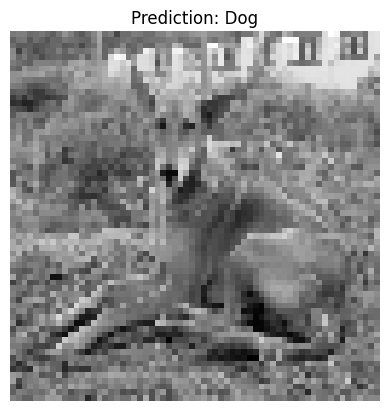

In [20]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    pred = svm.predict([gray])[0]
    label = "Cat" if pred == 1 else "Dog"

    plt.imshow(gray.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


Saving cat1.jpg to cat1 (1).jpg


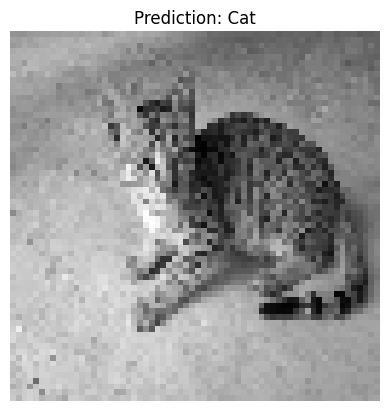

In [21]:

uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    pred = svm.predict([gray])[0]
    label = "Cat" if pred == 1 else "Dog"

    plt.imshow(gray.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


Saving dog img1.jpg to dog img1 (3).jpg


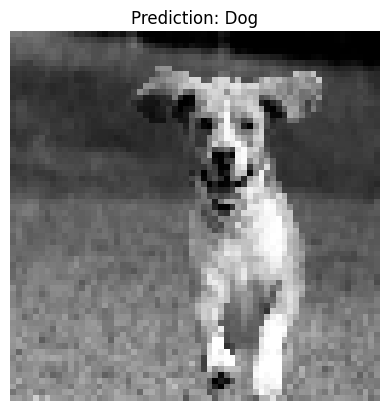

In [22]:

uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    pred = svm.predict([gray])[0]
    label = "Cat" if pred == 1 else "Dog"

    plt.imshow(gray.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()
